In [96]:
import numpy as np
from scipy.linalg import qr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pennylane as qml
import cmath

In [229]:
# construct an unitary matrix
p = [3 * np.pi / 4, 2 * np.pi * 0.625, 2 * np.pi * 0.625, 2 * np.pi * 0.625] # phase array
p_exp = [np.exp(complex(0,i)) for i in p]
U = np.diag(p_exp)
pd.DataFrame(U.reshape(4,4))

,0,1,2,3
0,-0.707107+0.707107j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
1,0.000000+0.000000j,-0.707107-0.707107j,0.000000+0.000000j,0.000000+0.000000j
2,0.000000+0.000000j,0.000000+0.000000j,-0.707107-0.707107j,0.000000+0.000000j
3,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.707107-0.707107j


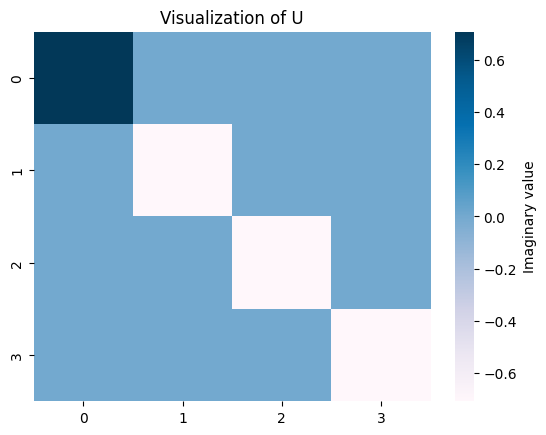

In [230]:
# adj matrix as a heatmap
sns.heatmap(pd.DataFrame(U.imag), cmap=plt.cm.PuBu, cbar_kws={'label': 'Imaginary value'})
plt.title('Visualization of U')
plt.show() # block diagonal ~ clusters

In [256]:
# Define matrix size (4×4) for eigenvalue multiplicities (1 and 3)
n = 4
p1 = 1j * 2 * np.pi * 0.2
p2 = 1j * 2 * np.pi * 0.625
eigenvalues = np.array([np.exp(p1),  # Multiplicity 1
                         np.exp(p2), np.exp(p2), np.exp(p2)])  # Multiplicity 3

# Generate a random unitary matrix using QR decomposition
Q, _ = qr(np.random.randn(n, n) + 1j * np.random.randn(n, n))

# Construct the unitary matrix via similarity transformation
U = Q @ np.diag(eigenvalues) @ Q.conj().T

def is_unitary(matrix): # unitarity check
    m_dagger = np.conjugate(matrix.transpose()) 
    identity = np.eye(matrix.shape[0])
    return np.allclose(np.dot(matrix, m_dagger), identity) 

is_unitary(U)

True

In [257]:
# Verify unitarity: U†U should be close to identity
print("U†U:\n", np.round(U.conj().T @ U, decimals=6))

# Print the unitary matrix
print("Unitary Matrix U:\n", np.round(U, decimals=4))

U†U:
 [[ 1.+0.j -0.-0.j -0.+0.j -0.-0.j]
 [-0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j  0.-0.j  1.+0.j -0.-0.j]
 [-0.+0.j  0.-0.j -0.+0.j  1.+0.j]]
Unitary Matrix U:
 [[-0.569 -0.4817j  0.0027-0.3219j -0.2099-0.1599j  0.2603+0.4509j]
 [-0.288 -0.1437j -0.5024-0.373j   0.3198+0.0297j -0.5595-0.2977j]
 [-0.0472-0.2596j -0.1187+0.2984j -0.5695-0.4826j -0.0795-0.5135j]
 [ 0.2836+0.4367j -0.0112-0.6337j -0.4214-0.3039j -0.1714+0.167j ]]


In [258]:
pd.DataFrame(U)

,0,1,2,3
0,-0.568954-0.481661j,0.002743-0.321851j,-0.209901-0.159878j,0.260330+0.450896j
1,-0.288016-0.143673j,-0.502392-0.373042j,0.319811+0.029711j,-0.559542-0.297653j
2,-0.047160-0.259606j,-0.118718+0.298442j,-0.569532-0.482605j,-0.079455-0.513451j
3,0.283564+0.436659j,-0.011184-0.633688j,-0.421416-0.303896j,-0.171426+0.167045j


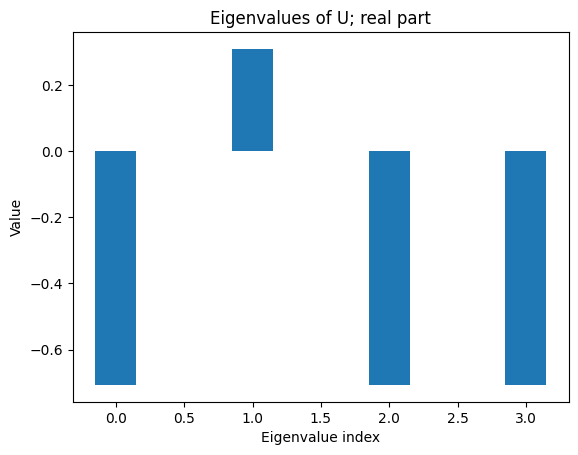

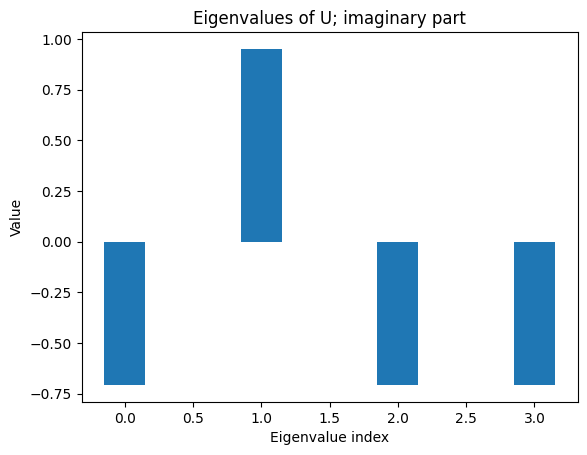

In [259]:
val, vec = np.linalg.eig(U)
plt.bar(range(len(val)), val.real, width=0.3)
plt.xlabel('Eigenvalue index')
plt.ylabel('Value')
plt.title('Eigenvalues of U; real part')
plt.show()

plt.bar(range(len(val)), val.imag, width=0.3)
plt.xlabel('Eigenvalue index')
plt.ylabel('Value')
plt.title('Eigenvalues of U; imaginary part')
plt.show()

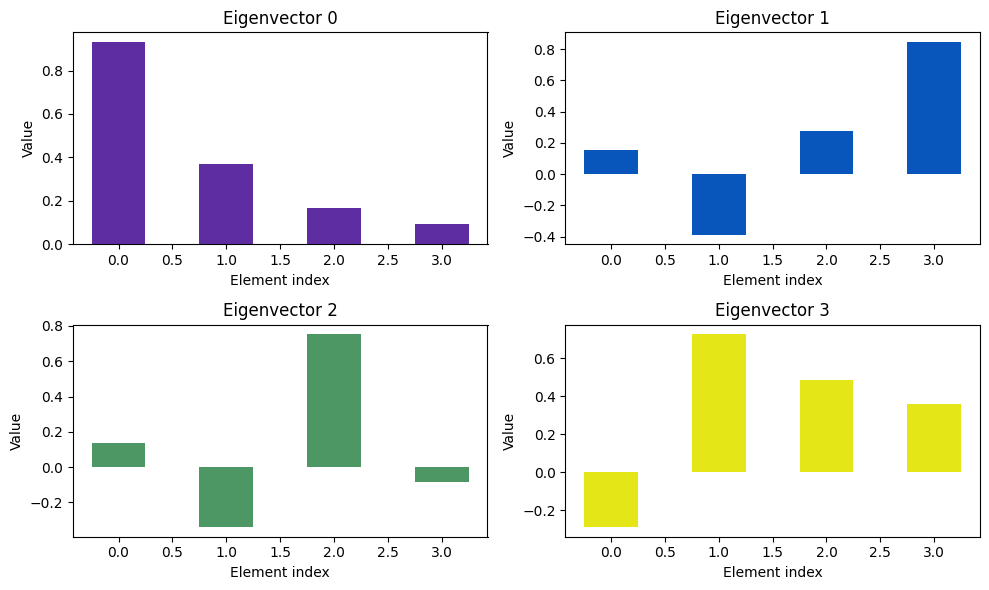

In [278]:
# random color generation
# colors
import random
random.seed(324)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(60)]

# visualization of eigenvectors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))  # 4 rows, 2 columns for 8 plots
axes = axes.flatten()  # Flatten the 2D array for easier indexing

# Loop through eigenvectors and plot each one
for i in range(4):
    axes[i].bar(range(4), vec[i], color=colors[i], width=0.5)
    axes[i].set_xlabel('Element index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Eigenvector {i}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [283]:
df = pd.DataFrame(vec)
df.index.name = 'eigenvector index'
df

,0,1,2,3
eigenvector index,,,,
0,0.929537+0.000000j,0.368602+0.009649j,0.166265+0.020303j,0.091180-0.158197j
1,0.151014-0.094321j,-0.386787+0.227734j,0.277032-0.235101j,0.845127+0.000000j
2,0.136079+0.052793j,-0.339445-0.142017j,0.751321+0.000000j,-0.081850-0.050014j
3,-0.287920+0.007537j,0.726072+0.000000j,0.487890-0.193403j,0.357974+0.339226j


In [267]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # measurement onto computational bases
    
    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(qml.QubitUnitary(U, wires=[0,1]), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

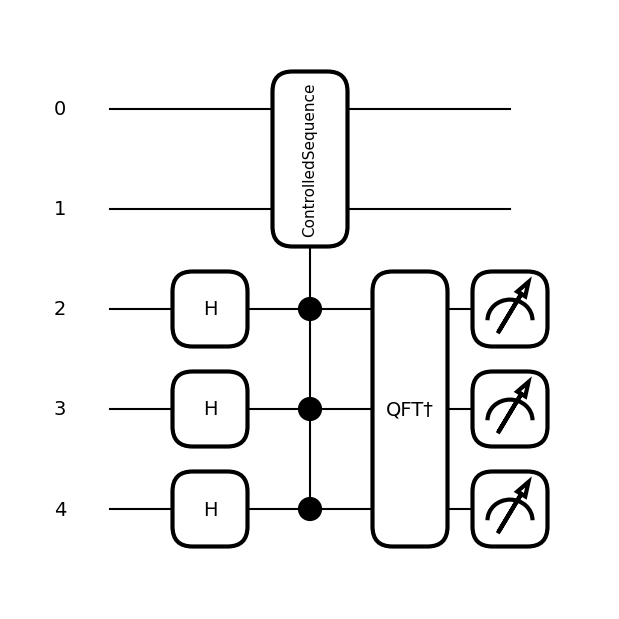

In [268]:
estimation_wires = range(2, 5)
fig, axs = qml.draw_mpl(circuit_qpe)(estimation_wires)

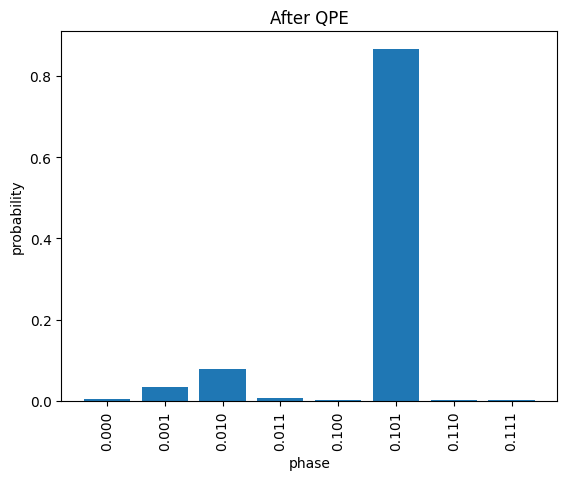

In [269]:
results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
# plt.subplots_adjust(bottom=0.3)
plt.title('After QPE')
plt.show()

In [270]:
int(np.round(np.sqrt(8) * np.pi / 4))

2

In [271]:
estimation_wires[1]

3

In [272]:
dev = qml.device("default.qubit", wires=range(6))

def circuit_qpe(estimation_wires):
    # measurement onto computational bases
    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(qml.QubitUnitary(U, wires=[0,1]), control=estimation_wires)
    qml.adjoint(qml.QFT)(wires=estimation_wires)

def U011(estimation_wires):
    qml.PauliX(wires=estimation_wires[1])
    qml.PauliX(wires=estimation_wires[2])

def U101(estimation_wires):
    qml.PauliX(wires=estimation_wires[0])
    qml.PauliX(wires=estimation_wires[2])
    
def grover(estimation_wires, target, num_iterations):
    for _ in range(num_iterations):
        # qml.FlipSign(target, wires=estimation_wires)
        # qml.templates.GroverOperator(estimation_wires, work_wires=5)
        qml.MultiControlledX(control_wires=estimation_wires, wires=5, control_values=target) # target as string
        qml.Reflection(U011(estimation_wires))

@qml.qnode(dev)
def qpe_grover(estimation_wires, target, num_iterations): # target = [1,0,1] or [0,1,1]
    circuit_qpe(estimation_wires)
    qml.Barrier()
    grover(estimation_wires, target, num_iterations)
    return qml.probs(wires=estimation_wires)

# results = qml.snapshots(qpe_grover)(range(2, 5), [1,0,1])

# for k, result in results.items():
#     print(f"{k}: {result}")

estimation_wires = range(2, 5)
result = qpe_grover(estimation_wires, '101', 2)
result

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1171: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1177: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'wires'

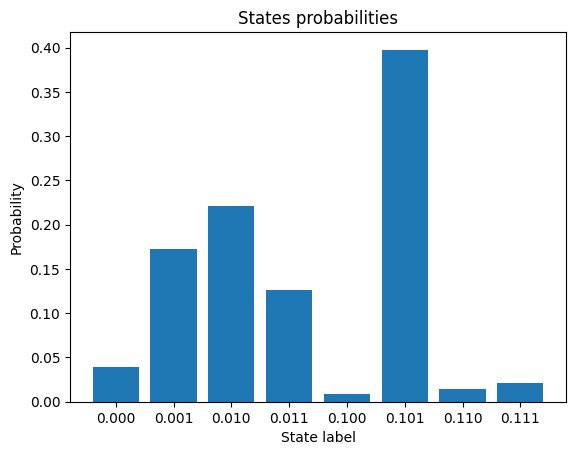

In [251]:
bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(result))]

plt.bar(bit_strings, result)

# plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability")
plt.title("States probabilities")
plt.show()

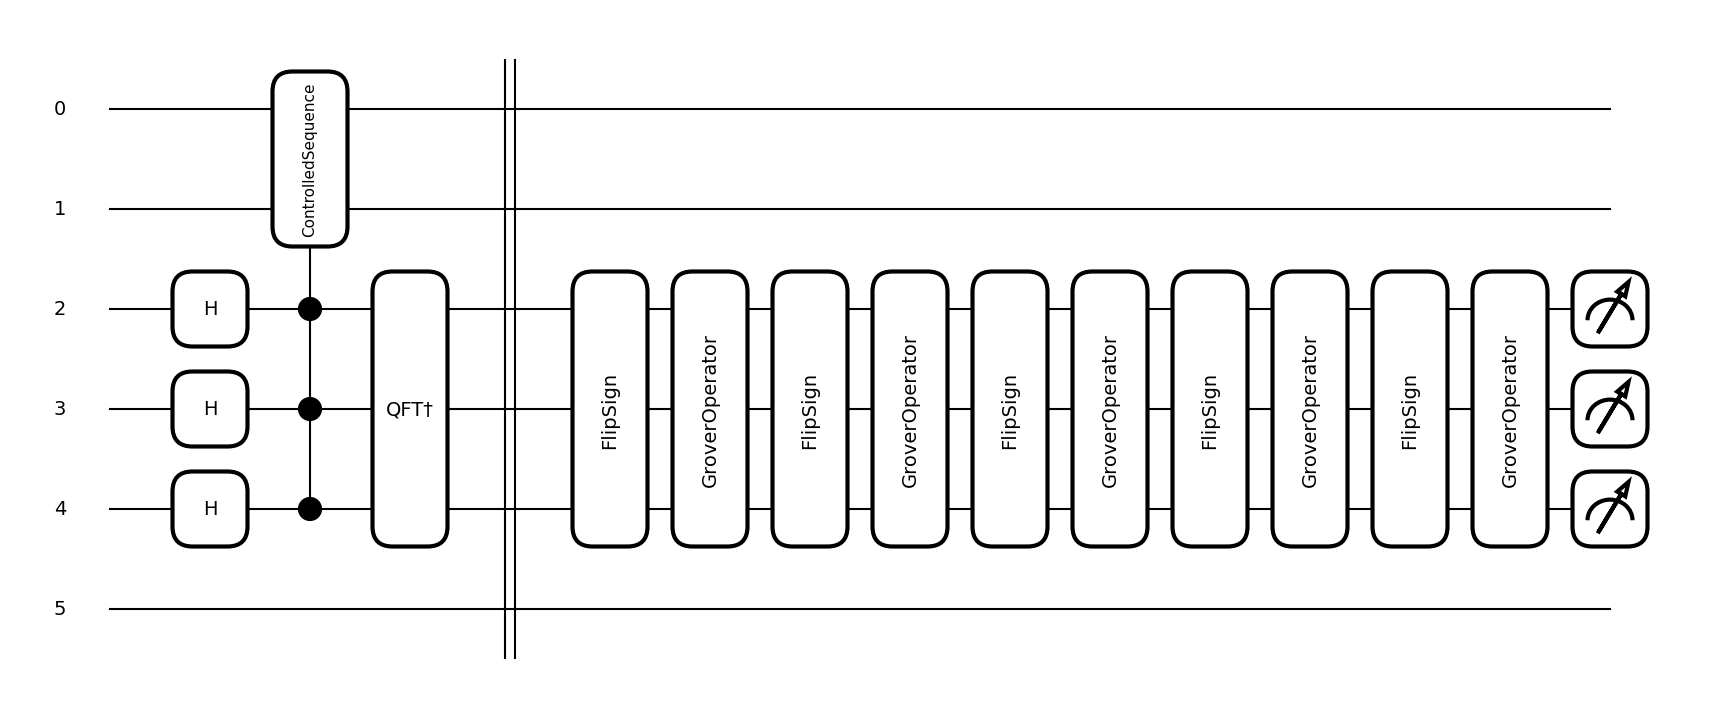

In [211]:
fig, axs = qml.draw_mpl(qpe_grover, show_all_wires=True)(estimation_wires=range(2, 5), target=[1,0,1], num_iterations=5)